In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import time

%matplotlib inline

In [2]:
raw_data = pd.read_csv('file:///C:/Users/JChaotogo/Documents/DataSets/epi_r.csv')

In [3]:
raw_data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#Drop null entries, we can add them in later if needed.
null_count = raw_data.isnull().sum()
null_count[null_count>0]
raw_data.dropna(inplace=True)

Text(0.5,1,'Rating Distribution')

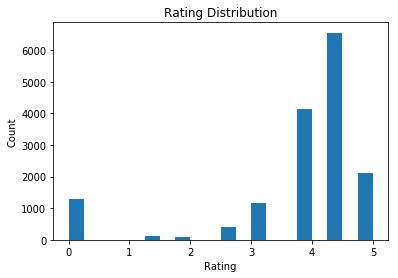

In [5]:
plt.hist(raw_data.rating, bins=20)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')

In [6]:
#We're going to try to use the rating variable as the outcome by changing it to a binary variable
display(raw_data['rating'].value_counts())
raw_data['goodrating'] = np.where(raw_data.rating>=4.0, 1, 0)
display(raw_data.goodrating.value_counts())

4.375    6552
3.750    4136
5.000    2106
0.000    1296
3.125    1165
2.500     405
1.250     123
1.875      81
Name: rating, dtype: int64

1    8658
0    7206
Name: goodrating, dtype: int64

In [7]:
#Seperate outcome variable from potential features.
X=raw_data.drop(['title', 'rating', 'goodrating'], 1)
Y=raw_data['goodrating']

In [8]:
#Select 30 features that best explains the variance out of all the columns using SelectKBest
Xnew = SelectKBest(f_classif, k=30).fit_transform(X,Y)

C:\Users\JChaotogo\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [ 97 199 225 229 247 292 298 323 385 401 528 647] are constant.
  UserWarning)
C:\Users\JChaotogo\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [9]:
Xnew.shape
#is there a way to see which features were chosen?

(15864, 30)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(Xnew, Y, test_size=.2)

svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.5606681374093917

In [11]:
start = time.time()
print(cross_val_score(svc, X, Y, cv=3, n_jobs=-1))
print(time.time()-start)

[0.55011346 0.56562027 0.57847958]
264.92264556884766


In [12]:
start=time.time()
predy = svc.predict(X_test)
print(pd.crosstab(y_test,predy))
print(classification_report(y_test, predy))
print(time.time()-start)

goodrating     0     1
row_0                 
0            339   268
1           1126  1440
             precision    recall  f1-score   support

          0       0.56      0.23      0.33      1465
          1       0.56      0.84      0.67      1708

avg / total       0.56      0.56      0.51      3173

1.6025755405426025


# Conclusion
I was able to get better results by changing the SVR to SVC, but the model still had trouble picking recipes with low reviews as seen witht he recall score of 0.23 and a f1 score of 0.33. The features in this dataset are mostly of ingredients. These features are remarkably hard to use to gauage the ratings of recipes. All ingredients could be used to make a great recipe. Soem ingredients, however, are univerally enjoyed and more likely to result in a positive review regardless of how it is prepared.